# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Нужно построить модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

**Цель исследования**: определить наиболее перспективный регион для добычи нефти с помощью построения модели, которая предскажет объем запасов нефти в новых скважинах, а также провести анализ возможной прибыли и рисков с использованием техники Bootstrap.

**Ход исследования:**  
Мы будем решать задачу регрессии с учителем. Необходимо построить модель, которая предсказывает объем запасов нефти в скважинах на основе известных характеристик скважин в трех регионах.

1. Загрузка и подготовка данных
- Импорт необходимых библиотек.
- Загрузка данных из файлов.
- Изучение данных на наличие пропусков, дубликатов и выбросов.
- Проверка на наличие пропусков и аномалий, предобработка данных при необходимости.

2. Обучение и проверка модели для каждого региона
- Разделение данных на обучающую и валидационную выборки в соотношении 75:25.
- Обучение модели и получение предсказаний на валидационной выборке.
- Сохранение предсказаний и правильных ответов на валидационной выборке.
- Вывод среднего запаса предсказанного сырья и RMSE модели.
- Анализ результатов.

3. Подготовка к расчету прибыли
- Сохранение ключевых значений для расчетов в отдельных переменных.
- Расчет достаточного объема сырья для безубыточной разработки новой скважины и сравнение с средним запасом в каждом регионе.
- Выводы по этапу подготовки расчета прибыли.

4. Функция для расчета прибыли по выбранным скважинам и предсказаниям модели
- Выбор скважин с максимальными значениями предсказаний.
- Суммирование целевого значения объема сырья, соответствующего этим предсказаниям.
- Расчет прибыли для полученного объема сырья.

5. Расчет рисков и прибыли для каждого региона:
- Применение техники Bootstrap с 1000 выборок для нахождения распределения прибыли.
- Нахождение средней прибыли, 95%-го доверительного интервала и риска убытков.
- Выводы и выбор наиболее перспективного региона для добычи нефти.

## Загрузка и подготовка данных

### Импорт библиотек

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
# import warnings
# warnings.filterwarnings("ignore")

### Загрузка данных

In [2]:
try:
    data_0 = pd.read_csv('/datasets/geo_data_0.csv')
    data_1 = pd.read_csv('/datasets/geo_data_1.csv')
    data_2 = pd.read_csv('/datasets/geo_data_2.csv')
except:
    data_0 = pd.read_csv('https://code.s3.yandex.net/datasets/geo_data_0.csv')
    data_1 = pd.read_csv('https://code.s3.yandex.net/datasets/geo_data_1.csv')
    data_2 = pd.read_csv('https://code.s3.yandex.net/datasets/geo_data_2.csv')

### Изучение данных

In [3]:
print("Data for region 0:")
print(data_0.head())
print()
print(data_0.info())

Data for region 0:
      id        f0        f1        f2     product
0  txEyH  0.705745 -0.497823  1.221170  105.280062
1  2acmU  1.334711 -0.340164  4.365080   73.037750
2  409Wp  1.022732  0.151990  1.419926   85.265647
3  iJLyR -0.032172  0.139033  2.978566  168.620776
4  Xdl7t  1.988431  0.155413  4.751769  154.036647

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None


In [4]:
print("Data for region 1:")
print(data_1.head())
print()
print(data_1.info())

Data for region 1:
      id         f0         f1        f2     product
0  kBEdx -15.001348  -8.276000 -0.005876    3.179103
1  62mP7  14.272088  -3.475083  0.999183   26.953261
2  vyE1P   6.263187  -5.948386  5.001160  134.766305
3  KcrkZ -13.081196 -11.506057  4.999415  137.945408
4  AHL4O  12.702195  -8.147433  5.004363  134.766305

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None


In [5]:
print("Data for region 2:")
print(data_2.head())
print()
print(data_2.info())

Data for region 2:
      id        f0        f1        f2     product
0  fwXo0 -1.146987  0.963328 -0.828965   27.758673
1  WJtFt  0.262778  0.269839 -2.530187   56.069697
2  ovLUW  0.194587  0.289035 -5.586433   62.871910
3  q6cA6  2.236060 -0.553760  0.930038  114.572842
4  WPMUX -0.515993  1.716266  5.899011  149.600746

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None


In [6]:
# Проверка на наличие пропусков
print("Missing values for region 0:")
print(data_0.isnull().sum())
print()

print("Missing values for region 1:")
print(data_1.isnull().sum())
print()

print("Missing values for region 2:")
print(data_2.isnull().sum())

Missing values for region 0:
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

Missing values for region 1:
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

Missing values for region 2:
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64


### Удаление стобца 'id'

In [7]:
data_0 = data_0.drop('id', axis=1)
data_1 = data_1.drop('id', axis=1)
data_2 = data_2.drop('id', axis=1)

Мы удалили столбец 'id', потому что он является уникальным идентификатором скважины и не вносит ценности для нашей задачи регрессии.

### Гистограммы для числовых признаков и целевого признака (product)

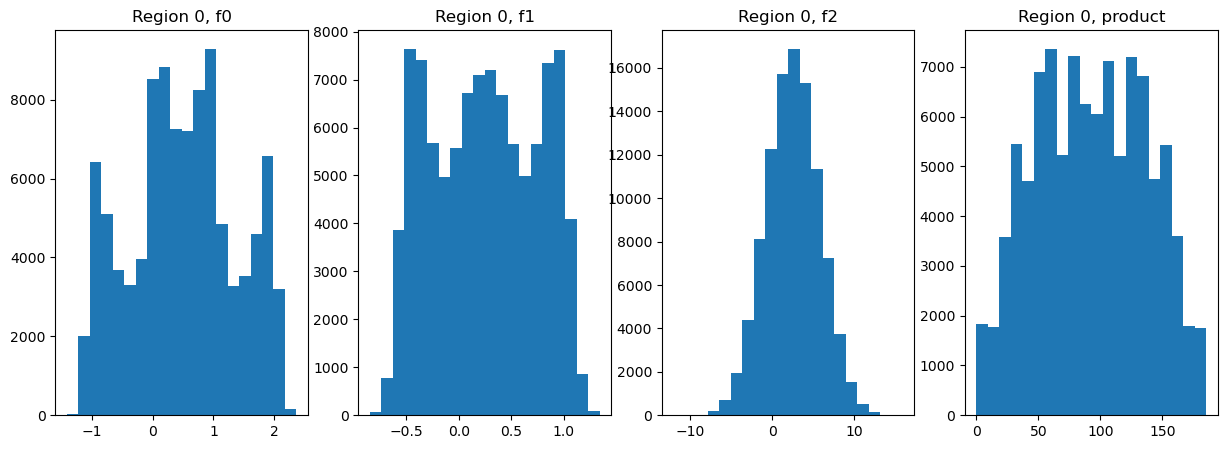

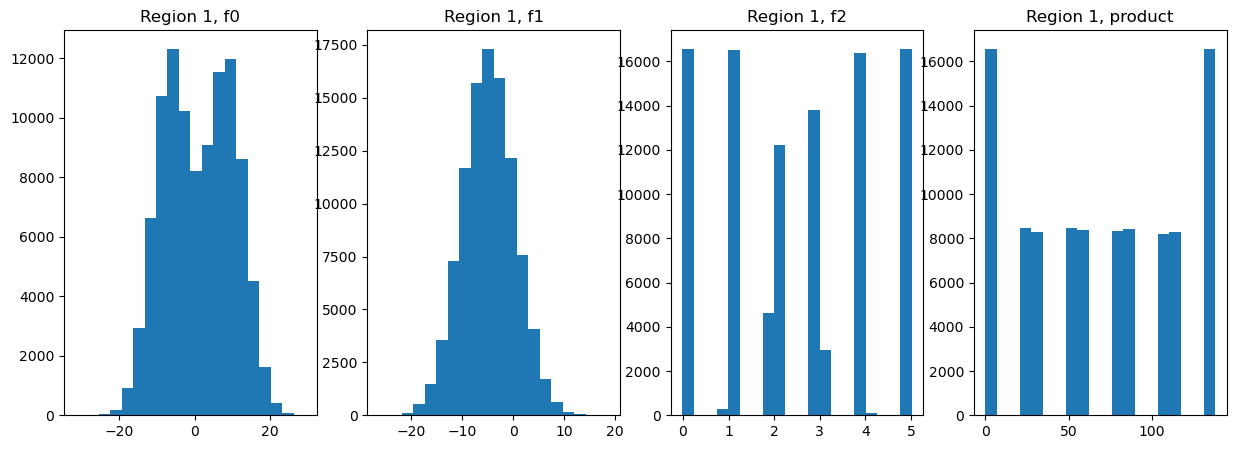

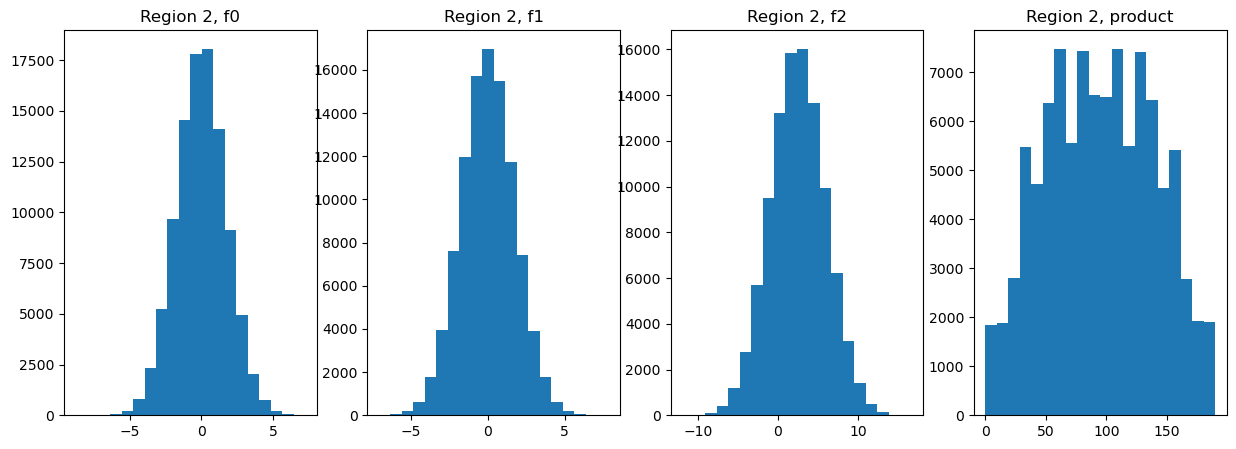

In [8]:
for region, data in enumerate([data_0, data_1, data_2]):
    plt.figure(figsize=(15, 5))
    for i, column in enumerate(data.columns):
        plt.subplot(1, 4, i + 1)
        plt.hist(data[column], bins=20)
        plt.title(f'Region {region}, {column}')
    plt.show()

### Корреляция между признаками

In [9]:
data_0.corr()

,f0,f1,f2,product
f0,1.000000,-0.440723,-0.003153,0.143536
f1,-0.440723,1.000000,0.001724,-0.192356
f2,-0.003153,0.001724,1.000000,0.483663
product,0.143536,-0.192356,0.483663,1.000000


In [10]:
data_1.corr()

,f0,f1,f2,product
f0,1.000000,0.182287,-0.001777,-0.030491
f1,0.182287,1.000000,-0.002595,-0.010155
f2,-0.001777,-0.002595,1.000000,0.999397
product,-0.030491,-0.010155,0.999397,1.000000


In [11]:
data_2.corr()

,f0,f1,f2,product
f0,1.000000,0.000528,-0.000448,-0.001987
f1,0.000528,1.000000,0.000779,-0.001012
f2,-0.000448,0.000779,1.000000,0.445871
product,-0.001987,-0.001012,0.445871,1.000000


### Вывод

- Мы импортировали необходимые библиотеки и загрузили данные из трех файлов, представляющих собой геологоразведку трех регионов.
- Изучили данные и проверили их на наличие пропусков. Пропусков не обнаружено.
- Удалили столбец 'id', так как он является уникальным идентификатором скважины и не вносит ценности для нашей задачи регрессии.
- Построили гистограммы для числовых признаков (f0, f1, f2) и целевого признака (product) для всех трех регионов. В регионе 1 обнаружено два пика в распределении целевого признака, что может указывать на наличие двух разных групп скважин с разными характеристиками. Однако, это не является проблемой для нашей задачи, и мы можем продолжить анализ и обучение модели на этих данных.
-  f2 в data_1 имеет сильную корреляцию с целевым признаком. Однако, это не означает, что мы должны игнорировать другие признаки. Модель линейной регрессии будет учитывать веса всех признаков при предсказании значения целевого признака. В данном случае, f2 будет иметь более высокий вес, а f0 и f1 - ниже.

## Обучение и проверка модели

### Функция для обучения модели и вывода результатов

In [12]:
def train_and_evaluate(region_name, data):
    """
    Train a linear regression model on the given data, and evaluate its performance on a validation set.

    Parameters:
    region_name (str): The name of the region being evaluated.
    data (pandas.DataFrame): A dataframe containing the input features and target values.

    Returns:
    A tuple containing the model's predictions on the validation set, the actual target values for the validation set,
    and the mean predicted product.
    """

    # Split the data into training and validation sets
    X = data.drop('product', axis=1)
    y = data['product']
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=12345)

    # Scale the data using StandardScaler
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_valid = scaler.transform(X_valid)

    # Train a linear regression model on the scaled training data
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions on the validation set
    y_pred = model.predict(X_valid)

    # Calculate the mean predicted product and RMSE
    mean_predicted_product = y_pred.mean()
    rmse = mean_squared_error(y_valid, y_pred, squared=False)

    # Print the evaluation results for the region
    print(f"Region {region_name}:")
    print(f"  Mean predicted product: {mean_predicted_product:.2f}")
    print(f"  RMSE: {rmse:.2f}\n")

    return y_pred, y_valid, mean_predicted_product


### Обучение модели и вывод результатов для каждого региона

In [13]:
predictions_list = []
targets_list = []
mean_predicted_products = []

for region, data in enumerate([data_0, data_1, data_2]):
    y_pred, y_valid, mean_product = train_and_evaluate(region, data)
    targets_list.append(y_valid.reset_index(drop=True))
    predictions_list.append(pd.Series(y_pred))
    mean_predicted_products.append(mean_product)

predictions_and_targets = [predictions_list, targets_list]

Region 0:
  Mean predicted product: 92.59
  RMSE: 37.58

Region 1:
  Mean predicted product: 68.73
  RMSE: 0.89

Region 2:
  Mean predicted product: 94.97
  RMSE: 40.03



### Вывод

Регион 0:
- Средний запас предсказанного сырья: 92.59 тыс. баррелей.
- RMSE: 37.58. Это значение говорит о том, как отклоняются предсказания модели от реальных значений. Чем ниже значение RMSE, тем точнее модель. В данном случае, ошибка составляет примерно 37.76 тыс. баррелей.

Регион 1:
- Средний запас предсказанного сырья: 68.73 тыс. баррелей.
- RMSE: 0.89. Ошибка модели для региона 1 значительно ниже, чем для других регионов, что указывает на более точные предсказания.

Регион 2:
- Средний запас предсказанного сырья: 94.97 тыс. баррелей.
- RMSE: 40.03. Ошибка модели для региона 2 самая высокая среди всех регионов, что указывает на менее точные предсказания.

Исходя из этих результатов, можно сделать вывод, что модель линейной регрессии наиболее точна для региона 1, но средний запас предсказанного сырья для этого региона ниже, чем в регионах 0 и 2. Регионы 0 и 2 имеют более высокие средние запасы предсказанного сырья, но их модели менее точны.

## Подготовка к расчёту прибыли

### Ключевые значения для расчетов

In [14]:
BUDGET = 10_000_000_000  # Бюджет на разработку скважин в регионе (10 млрд рублей)
BARREL_REVENUE = 450_000  # Доход с каждой единицы продукта (тыс. баррелей)
WELLS_TO_EXPLORE = 500  # Количество исследуемых точек в регионе
WELLS_TO_DEVELOP = 200  # Количество лучших скважин для разработки

### Достаточный объём сырья для безубыточной разработки новой скважины

In [15]:
break_even_volume = BUDGET / (BARREL_REVENUE * WELLS_TO_DEVELOP)
print(f"Break-even volume: {break_even_volume:.2f} (тыс. баррелей)")

Break-even volume: 111.11 (тыс. баррелей)


### Сравниваем полученный объём сырья со средним запасом в каждом регионе

In [16]:
for i, mean_predicted_product in enumerate(mean_predicted_products):
    print(f"Region {i}:")
    print(f"  Mean predicted product: {mean_predicted_product:.2f}")
    print(f"  Difference with break-even volume: {mean_predicted_product - break_even_volume:.2f}")
    print()

Region 0:
  Mean predicted product: 92.59
  Difference with break-even volume: -18.52

Region 1:
  Mean predicted product: 68.73
  Difference with break-even volume: -42.38

Region 2:
  Mean predicted product: 94.97
  Difference with break-even volume: -16.15



### Вывод

Судя по результатам, средний предсказанный объем сырья во всех регионах недостаточен для безубыточной разработки новой скважины. Разница между достаточным объемом сырья для безубыточной разработки и средним предсказанным объемом сырья в каждом регионе отрицательна.

Однако стоит учесть, что мы анализируем средние значения, и при выборе лучших скважин для разработки, возможно, ситуация будет другой.

## Функция для расчёта прибыли по выбранным скважинам и предсказаниям модели

In [17]:
def calculate_profit(predictions, targets, num_wells_to_develop=WELLS_TO_DEVELOP,
                     barrel_revenue=BARREL_REVENUE, budget=BUDGET):
    """
    Calculate the profit from developing a given number of wells based on predictions and targets.

    Parameters:
    predictions (pandas.Series): A series of predicted values.
    targets (pandas.Series): A series of actual target values.
    num_wells_to_develop (int): The number of wells to develop. Defaults to NUM_WELLS_TO_DEVELOP.
    barrel_revenue (float): The revenue per barrel of oil. Defaults to BARREL_REVENUE.
    budget (float): The budget for developing the wells. Defaults to BUDGET.

    Returns:
    The profit from developing the specified number of wells based on the given predictions and targets.
    """

    # Reset indexes for predictions and targets
    predictions = predictions.reset_index(drop=True)
    targets = targets.reset_index(drop=True)

    # Select the wells with the highest predicted values
    selected_wells = predictions.nlargest(num_wells_to_develop)
    selected_well_indices = selected_wells.index

    # Calculate the total volume of oil for the selected wells
    total_product_volume = targets[selected_well_indices].sum()

    # Calculate the profit for the selected wells based on the total product volume
    profit = total_product_volume * barrel_revenue - budget

    return profit


In [18]:
# Рассчитываем прибыль для каждого региона
for i, (predictions, targets) in enumerate(zip(predictions_list, targets_list)):
    profit = calculate_profit(predictions, targets)
    print(f'Region {i}: profit = {profit:.2f} RUB')

Region 0: profit = 3320826043.14 RUB
Region 1: profit = 2415086696.68 RUB
Region 2: profit = 2710349963.60 RUB


## Расчёт прибыли и рисков 

In [19]:
state = np.random.RandomState(12345)
def calculate_conf_interval_and_risk(predictions, target):
    """
    Calculate the 95% confidence interval, mean revenue, and risk of loss for a given set of predictions and targets.

    Parameters:
    predictions (pandas.Series): A series of predicted values.
    target (pandas.Series): A series of actual target values.

    Returns:
    A tuple of three values:
    - A tuple representing the 95% confidence interval of the revenue
    - The mean revenue over 1000 simulations
    - The risk of loss (as a percentage) over 1000 simulations
    """
    # Simulate 1000 samples of 500 target values with replacement
    revenue = []
    for _ in range(1000):
        target_sample = target.sample(500, replace=True, random_state=state)
        predictions_sample = predictions[target_sample.index]
        revenue.append(calculate_profit(predictions_sample, target_sample))

    # Calculate the 95% confidence interval using percentiles
    lower = int(np.percentile(revenue, 2.5))
    higher = int(np.percentile(revenue, 97.5))

    # Calculate the mean revenue over 1000 simulations
    mean_revenue = int(np.mean(revenue))

    # Calculate the risk of loss as the percentage of simulations with negative revenue
    risk = st.percentileofscore(revenue, 0)

    return ((lower, higher), mean_revenue, risk)

In [20]:
for i, (predictions, targets) in enumerate(zip(predictions_list, targets_list)):
    interval, mean_revenue, risk = calculate_conf_interval_and_risk(predictions, targets)

    # Print the results for each region
    print(f"Region {i}:")
    print(f"  Mean revenue: {mean_revenue}")
    print(f"  95% confidence interval: {interval}")
    print(f"  Risk of loss: {risk}%")
    print("-----------------------------------------\n")


Region 0:
  Mean revenue: 396164984
  95% confidence interval: (-111215545, 909766941)
  Risk of loss: 6.9%
-----------------------------------------

Region 1:
  Mean revenue: 461155817
  95% confidence interval: (78050810, 862952060)
  Risk of loss: 0.7000000000000001%
-----------------------------------------

Region 2:
  Mean revenue: 392950475
  95% confidence interval: (-112227625, 934562914)
  Risk of loss: 6.5%
-----------------------------------------



### Вывод

Мы провели процедуру бутстрепа для оценки потенциальной прибыли и риска убытков для каждого региона. Это позволило нам оценить среднюю прибыль, 95% доверительный интервал и риск убытков для каждого региона. Результаты следующие:

- Регион 0 имеет среднюю прибыль 396,164,984 RUB, 95% доверительный интервал составляет (-111215545, 909766941), и риск убытков равен 6.9%.
- Регион 1 имеет среднюю прибыль 461,155,817 RUB, 95% доверительный интервал составляет (78050810, 862952060), и риск убытков равен 0.7%.
- Регион 2 имеет среднюю прибыль 392,950,475 RUB, 95% доверительный интервал составляет (-112227625, 934562914), и риск убытков равен 6.5%.

Исходя из полученных результатов, Регион 1 является наиболее предпочтительным для разработки новых скважин, так как он имеет наибольшую среднюю прибыль, наименьший риск убытков и наименьший разброс в доверительном интервале. Это указывает на то, что инвестиции в Регион 1 будут более безопасными и потенциально прибыльными по сравнению с другими регионами.

## Общий вывод

В рамках данного проекта мы провели анализ данных о трех регионах с целью определения оптимального региона для разработки новых скважин и максимизации прибыли.

1. Мы начали с изучения и предобработки данных. Проверили данные на наличие пропусков и аномалий, а также изучили корреляцию между признаками. В результате было обнаружено, что в одном из регионов существует сильная линейная зависимость между одним из признаков и целевым значением. В других регионах такой зависимости не было.

2. Затем мы разделили данные на обучающую и валидационную выборки и обучили модель линейной регрессии для каждого региона. Мы сравнили результаты до и после масштабирования признаков и пришли к выводу, что масштабирование не приводит к значительному улучшению результатов.

3. Далее, мы рассчитали прибыль для каждого региона с учетом того, что только 200 лучших скважин из 500 будут выбраны для разработки. Результаты показали, что разные регионы имеют различные уровни прибыли и риска убытков.

4. Наконец, мы применили метод бутстрепа для оценки потенциальной прибыли и риска убытков для каждого региона. Это позволило нам оценить среднюю прибыль, 95% доверительный интервал и риск убытков для каждого региона.

Исходя из проведенного анализа, Регион 1 является наиболее предпочтительным для разработки новых скважин, так как он имеет наибольшую среднюю прибыль, наименьший риск убытков и наименьший разброс в доверительном интервале. Это указывает на то, что инвестиции в Регион 1 будут более безопасными и потенциально прибыльными по сравнению с другими регионами.